In [1]:
import requests

# Coordinates for Würzburg
latitude = 49.783333
longitude = 9.933333

# Open-Meteo API endpoint and parameters
url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m"

# Send a GET request to the API
response = requests.get(url)

# Parse the JSON response
weather_data = response.json()

# Display the result
weather_data


{'latitude': 49.78,
 'longitude': 9.940001,
 'generationtime_ms': 0.1609325408935547,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 179.0,
 'current_units': {'time': 'iso8601',
  'interval': 'seconds',
  'temperature_2m': '°C',
  'wind_speed_10m': 'km/h'},
 'current': {'time': '2024-10-11T09:00',
  'interval': 900,
  'temperature_2m': 10.9,
  'wind_speed_10m': 9.2},
 'hourly_units': {'time': 'iso8601',
  'temperature_2m': '°C',
  'relative_humidity_2m': '%',
  'wind_speed_10m': 'km/h'},
 'hourly': {'time': ['2024-10-11T00:00',
   '2024-10-11T01:00',
   '2024-10-11T02:00',
   '2024-10-11T03:00',
   '2024-10-11T04:00',
   '2024-10-11T05:00',
   '2024-10-11T06:00',
   '2024-10-11T07:00',
   '2024-10-11T08:00',
   '2024-10-11T09:00',
   '2024-10-11T10:00',
   '2024-10-11T11:00',
   '2024-10-11T12:00',
   '2024-10-11T13:00',
   '2024-10-11T14:00',
   '2024-10-11T15:00',
   '2024-10-11T16:00',
   '2024-10-11T17:00',
   '2024-10-11T18:00',
   '20

In [2]:
# Show keys of the dictionary
weather_data.keys()


dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'current_units', 'current', 'hourly_units', 'hourly'])

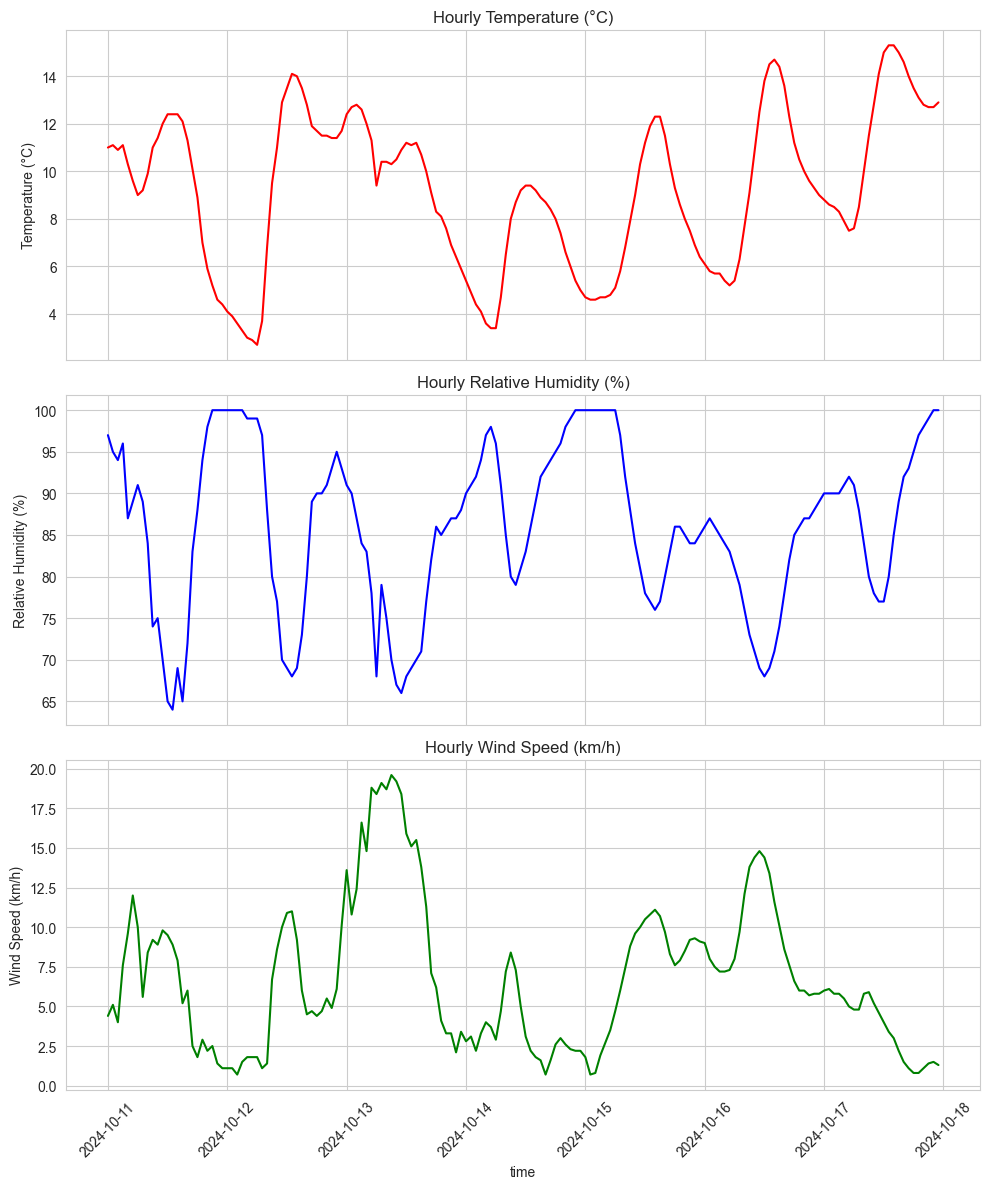

,time,temperature_2m,relative_humidity_2m,wind_speed_10m
0,2024-10-11 00:00:00,11.0,97,4.4
1,2024-10-11 01:00:00,11.1,95,5.1
2,2024-10-11 02:00:00,10.9,94,4.0
3,2024-10-11 03:00:00,11.1,96,7.6
4,2024-10-11 04:00:00,10.3,87,9.6


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract relevant data from the JSON response
hourly_data = {
    'time': weather_data['hourly']['time'],
    'temperature_2m': weather_data['hourly']['temperature_2m'],
    'relative_humidity_2m': weather_data['hourly']['relative_humidity_2m'],
    'wind_speed_10m': weather_data['hourly']['wind_speed_10m'],
}

# Create a DataFrame from the hourly data
df = pd.DataFrame(hourly_data)

# Convert 'time' column to datetime for better plotting
df['time'] = pd.to_datetime(df['time'])

# Set the plot style
sns.set_style('whitegrid')

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot temperature over time
sns.lineplot(ax=axes[0], x='time', y='temperature_2m', data=df, color='red')
axes[0].set_title('Hourly Temperature (°C)')
axes[0].set_ylabel('Temperature (°C)')

# Plot relative humidity over time
sns.lineplot(ax=axes[1], x='time', y='relative_humidity_2m', data=df, color='blue')
axes[1].set_title('Hourly Relative Humidity (%)')
axes[1].set_ylabel('Relative Humidity (%)')

# Plot wind speed over time
sns.lineplot(ax=axes[2], x='time', y='wind_speed_10m', data=df, color='green')
axes[2].set_title('Hourly Wind Speed (km/h)')
axes[2].set_ylabel('Wind Speed (km/h)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add some space between plots
plt.tight_layout()

# Display the plots
plt.show()


# Show the first few rows of the dataframe to summarize the data
df.head()


In [4]:
# Extract the date part from the time column to get unique days
df['date'] = df['time'].dt.date

# Get the unique days for which a forecast is available
unique_days = df['date'].unique()

# Display the unique days
print(unique_days)


[datetime.date(2024, 10, 11) datetime.date(2024, 10, 12)
 datetime.date(2024, 10, 13) datetime.date(2024, 10, 14)
 datetime.date(2024, 10, 15) datetime.date(2024, 10, 16)
 datetime.date(2024, 10, 17)]


In [5]:
df

,time,temperature_2m,relative_humidity_2m,wind_speed_10m,date
0,2024-10-11 00:00:00,11.0,97,4.4,2024-10-11
1,2024-10-11 01:00:00,11.1,95,5.1,2024-10-11
2,2024-10-11 02:00:00,10.9,94,4.0,2024-10-11
3,2024-10-11 03:00:00,11.1,96,7.6,2024-10-11
4,2024-10-11 04:00:00,10.3,87,9.6,2024-10-11
...,...,...,...,...,...
163,2024-10-17 19:00:00,13.1,97,0.8,2024-10-17
164,2024-10-17 20:00:00,12.8,98,1.1,2024-10-17
165,2024-10-17 21:00:00,12.7,99,1.4,2024-10-17
166,2024-10-17 22:00:00,12.7,100,1.5,2024-10-17


In [6]:
# Save the data to a CSV file (include the current date in the filename)
filename = f"weather/weather_forecast_{unique_days[0]}.csv"

# Save the data to a CSV file
df.to_csv(filename, index=False)